In [2]:
import platform

import pyiqa
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2
import torch

from basicsr.data.create_h5_dataset import img_to_patches, data_augmentation

platform = platform.system()
if platform == 'Linux':
    !BASICSR_JIT=True
else:
    !set BASICSR_JIT=True


In [7]:
hazy_0 = np.array(Image.open("D:/DeepLearning/dataset/NTIRE/hazy/037.JPG").convert("RGB")) / 255
clear_0 = np.array(Image.open("D:/DeepLearning/dataset/NTIRE/clean/037.JPG").convert("RGB")) / 255
psnr = pyiqa.create_metric("psnr")
ssim = pyiqa.create_metric("ssim")

In [16]:
scales = [0, 0.2]
size = 256
stride = 250
count = 0
count_bad = 0
images = []
images_metric = []
bad_images = []
bad_images_metric = []
for scale in scales:
    if scale == 0:
        hazy = cv2.resize(hazy_0, (size, size), interpolation=cv2.INTER_AREA)
        clear = cv2.resize(clear_0, (size, size), interpolation=cv2.INTER_AREA)
    else:
        hazy = cv2.resize(hazy_0, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        clear = cv2.resize(clear_0, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    hazy = img_to_patches(hazy.transpose(2, 0, 1), size, stride)
    clear = img_to_patches(clear.transpose(2, 0, 1), size, stride)
    print("分割后的图片形状{}".format(str(hazy.shape)))
    for nx in range(clear.shape[3]):
        clear_out, hazy_out = data_augmentation(
            clear[:, :, :, nx].copy(),
            hazy[:, :, :, nx].copy(),
            np.random.randint(0, 7)
        )
        clear_out = torch.Tensor(clear_out.copy()).squeeze()[None, ::]
        hazy_out = torch.Tensor(hazy_out.copy()).squeeze()[None, ::]
        
        psnr_hl = psnr(clear_out, hazy_out).item()
        ssim_hl = ssim(clear_out, hazy_out).item()
        
        clear_out = clear_out.squeeze().permute(1, 2, 0)
        hazy_out = hazy_out.squeeze().permute(1, 2, 0)
        if 0.93 > clear_out.mean() > 0.05 and psnr_hl < 35 and ssim_hl < 0.92:
            images_metric.append({
                "PSNR": psnr_hl, 
                "SSIM": ssim_hl, 
                "Clear Mean": clear_out.mean(), 
                "Hazy Mean": hazy_out.mean()
            })
            images.append(clear_out)
            images.append(hazy_out)
            count += 1
        else:
            bad_images_metric.append({
                "PSNR": psnr_hl,
                "SSIM": ssim_hl,
                "Clear Mean": clear_out.mean(),
                "Hazy Mean": hazy_out.mean()
            })
            bad_images.append(clear_out)
            bad_images.append(hazy_out)
            count_bad += 1
print("共计{}张分割后的图片".format(count))   
print("去除了{}张不符合要求过白或过暗的图片".format(count_bad))

分割后的图片形状(3, 256, 256, 1)
分割后的图片形状(3, 256, 256, 20)
共计14张分割后的图片
去除了7张不符合要求过白或过暗的图片


tensor([[[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.9727, 1.0000, 1.0000],
         [0.9705, 1.0000, 1.0000],
         [0.9670, 1.0000, 0.9999]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.9727, 1.0000, 1.0000],
         [0.9727, 1.0000, 1.0000],
         [0.9702, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.9725, 1.0000, 1.0000],
         [0.9726, 1.0000, 1.0000],
         [0.9725, 1.0000, 1.0000]],

        ...,

        [[0.4370, 0.4384, 0.4807],
         [0.4875, 0.4938, 0.5374],
         [0.5105, 0.5198, 0.5615],
         ...,
         [0.4686, 0.4752, 0.5110],
         [0.4611, 0.4660, 0.5031],
         [0.4675, 0.4755, 0.5088]],

        [[0.4894, 0.5011, 0.5369],
         [0.5017, 0.4964, 0.5240],
         [0.

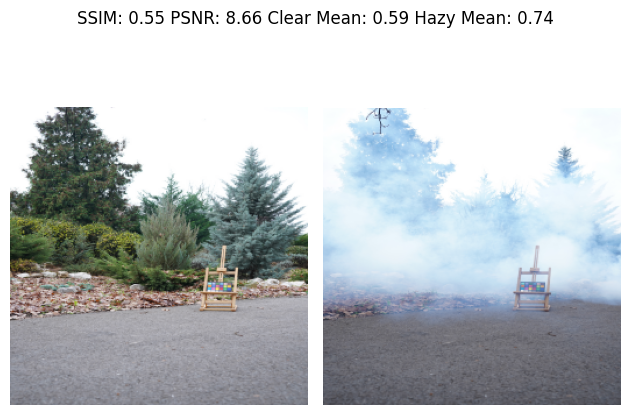

tensor([[[0.4438, 0.4602, 0.4544],
         [0.5167, 0.5293, 0.5315],
         [0.5555, 0.5697, 0.5725],
         ...,
         [0.4055, 0.3242, 0.2329],
         [0.4590, 0.3740, 0.2886],
         [0.4333, 0.3451, 0.2769]],

        [[0.6041, 0.5922, 0.5796],
         [0.6951, 0.6808, 0.6781],
         [0.6016, 0.5529, 0.5575],
         ...,
         [0.4351, 0.3415, 0.2664],
         [0.5159, 0.4427, 0.3674],
         [0.5360, 0.4505, 0.4033]],

        [[0.6000, 0.5707, 0.5592],
         [0.6082, 0.5624, 0.5572],
         [0.8419, 0.8089, 0.8099],
         ...,
         [0.5013, 0.3459, 0.2695],
         [0.3895, 0.2968, 0.2049],
         [0.3148, 0.2135, 0.1321]],

        ...,

        [[0.5355, 0.5349, 0.5669],
         [0.5396, 0.5396, 0.5716],
         [0.5511, 0.5511, 0.5865],
         ...,
         [0.6049, 0.6016, 0.6348],
         [0.6024, 0.5978, 0.6289],
         [0.6177, 0.6138, 0.6405]],

        [[0.5620, 0.5620, 0.5934],
         [0.5473, 0.5482, 0.5793],
         [0.

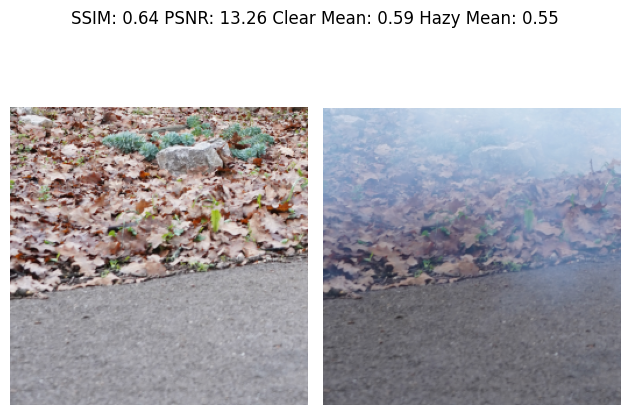

tensor([[[0.5046, 0.5454, 0.4958],
         [0.2002, 0.1907, 0.1564],
         [0.1912, 0.1167, 0.0838],
         ...,
         [0.6715, 0.5795, 0.5325],
         [0.7746, 0.7278, 0.6751],
         [0.4916, 0.4601, 0.3704]],

        [[0.3589, 0.3846, 0.2867],
         [0.1550, 0.1344, 0.1018],
         [0.2201, 0.1584, 0.1374],
         ...,
         [0.4471, 0.3398, 0.2179],
         [0.4394, 0.4224, 0.2082],
         [0.5760, 0.5895, 0.4640]],

        [[0.4027, 0.4008, 0.3325],
         [0.5834, 0.5669, 0.5062],
         [0.6675, 0.6409, 0.6373],
         ...,
         [0.4221, 0.2770, 0.1503],
         [0.5656, 0.6243, 0.3961],
         [0.4733, 0.4544, 0.2588]],

        ...,

        [[0.5352, 0.6256, 0.4662],
         [0.5799, 0.6398, 0.3645],
         [0.5857, 0.6411, 0.4190],
         ...,
         [0.3387, 0.4108, 0.3354],
         [0.3843, 0.4318, 0.3909],
         [0.1868, 0.2278, 0.1970]],

        [[0.6529, 0.7307, 0.6171],
         [0.7413, 0.7939, 0.6017],
         [0.

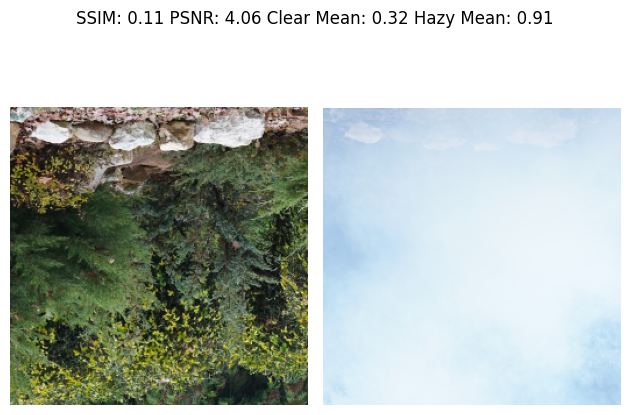

tensor([[[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.3209, 0.4296, 0.2533],
         [0.3628, 0.4711, 0.3194],
         [0.4201, 0.5227, 0.3815]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.3961, 0.4933, 0.2769],
         [0.3884, 0.4951, 0.2915],
         [0.3655, 0.4856, 0.2748]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.5305, 0.6067, 0.4420],
         [0.4204, 0.5224, 0.3335],
         [0.3528, 0.4717, 0.2627]],

        ...,

        [[0.2701, 0.3611, 0.3304],
         [0.2601, 0.3311, 0.3178],
         [0.3522, 0.4121, 0.4020],
         ...,
         [0.1595, 0.2373, 0.1697],
         [0.1655, 0.2511, 0.1812],
         [0.1683, 0.2701, 0.1876]],

        [[0.6486, 0.7545, 0.7470],
         [0.4362, 0.5242, 0.5315],
         [0.

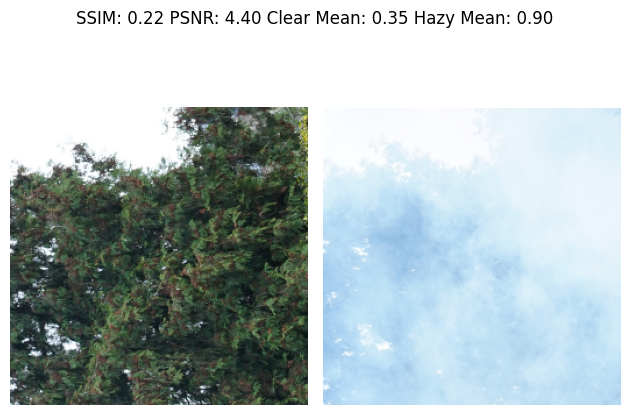

tensor([[[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        ...,

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.2637, 0.2538, 0.2135],
         [0.2621, 0.2656, 0.2260],
         [0.2229, 0.2254, 0.1956]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.

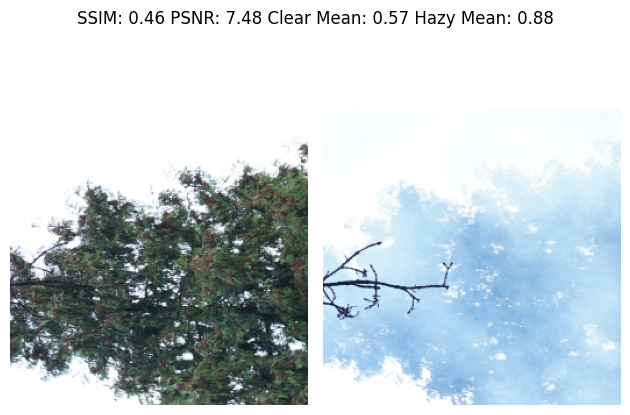

tensor([[[0.6102, 0.6063, 0.6323],
         [0.6323, 0.6284, 0.6519],
         [0.6599, 0.6557, 0.6797],
         ...,
         [0.1820, 0.1735, 0.1384],
         [0.1440, 0.1718, 0.0919],
         [0.4088, 0.5026, 0.3575]],

        [[0.6375, 0.6317, 0.6566],
         [0.6598, 0.6558, 0.6773],
         [0.6685, 0.6610, 0.6797],
         ...,
         [0.0610, 0.0765, 0.0425],
         [0.2099, 0.2648, 0.1602],
         [0.3506, 0.4397, 0.2591]],

        [[0.6419, 0.6380, 0.6591],
         [0.6623, 0.6584, 0.6780],
         [0.6626, 0.6563, 0.6717],
         ...,
         [0.1548, 0.1945, 0.1197],
         [0.3678, 0.4595, 0.3170],
         [0.5049, 0.5793, 0.3641]],

        ...,

        [[0.5956, 0.5889, 0.6268],
         [0.6309, 0.6273, 0.6587],
         [0.6072, 0.6064, 0.6389],
         ...,
         [0.5180, 0.3413, 0.2569],
         [0.4325, 0.3213, 0.2493],
         [0.3366, 0.2711, 0.1962]],

        [[0.6323, 0.6262, 0.6613],
         [0.6248, 0.6209, 0.6522],
         [0.

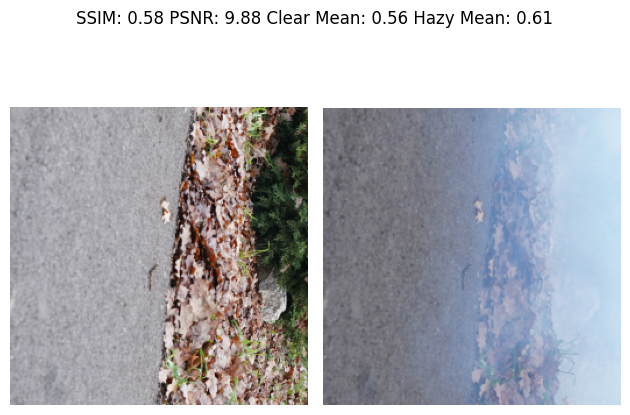

tensor([[[0.1796, 0.2778, 0.2365],
         [0.1641, 0.2704, 0.2251],
         [0.1694, 0.2827, 0.2358],
         ...,
         [0.1652, 0.1445, 0.1305],
         [0.2281, 0.2091, 0.1973],
         [0.1427, 0.1241, 0.1123]],

        [[0.1824, 0.2891, 0.2398],
         [0.1826, 0.2867, 0.2413],
         [0.1402, 0.2383, 0.2033],
         ...,
         [0.1798, 0.1693, 0.1479],
         [0.1565, 0.1385, 0.1278],
         [0.1238, 0.1057, 0.1035]],

        [[0.2078, 0.3244, 0.2682],
         [0.1752, 0.2849, 0.2378],
         [0.1395, 0.2359, 0.1986],
         ...,
         [0.1347, 0.1478, 0.1134],
         [0.1344, 0.1336, 0.1148],
         [0.1231, 0.1139, 0.1042]],

        ...,

        [[0.2888, 0.4136, 0.2447],
         [0.2149, 0.3231, 0.1956],
         [0.2838, 0.3562, 0.2607],
         ...,
         [0.4940, 0.2954, 0.2039],
         [0.5556, 0.4245, 0.3707],
         [0.5057, 0.4515, 0.2882]],

        [[0.2609, 0.3548, 0.2080],
         [0.2940, 0.3581, 0.2372],
         [0.

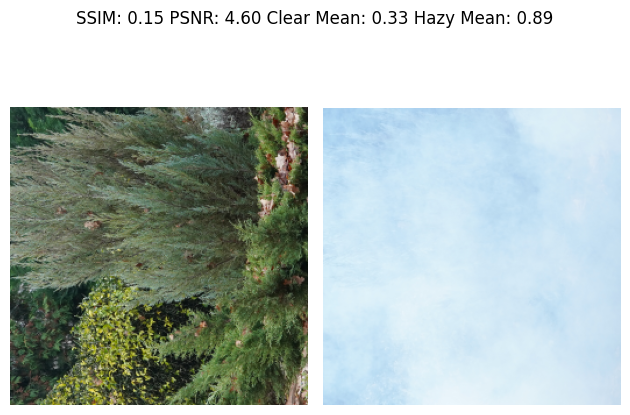

tensor([[[0.2675, 0.3448, 0.3522],
         [0.2767, 0.3556, 0.3410],
         [0.1879, 0.2566, 0.2411],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.3384, 0.3962, 0.4367],
         [0.3699, 0.4334, 0.4276],
         [0.2014, 0.2610, 0.2486],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.5746, 0.5997, 0.6008],
         [0.3859, 0.4094, 0.4020],
         [0.2883, 0.3396, 0.3224],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        ...,

        [[0.2758, 0.2904, 0.2052],
         [0.2226, 0.2695, 0.1912],
         [0.2671, 0.3595, 0.2764],
         ...,
         [0.1942, 0.2938, 0.2530],
         [0.1424, 0.2417, 0.2042],
         [0.2022, 0.3227, 0.2737]],

        [[0.2853, 0.3540, 0.2494],
         [0.2191, 0.2907, 0.2091],
         [0.

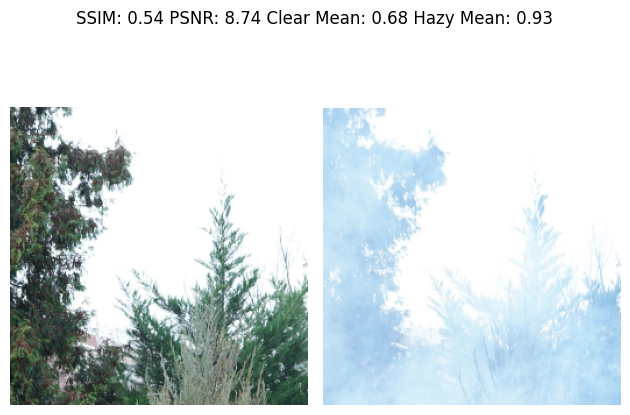

tensor([[[0.5751, 0.5711, 0.5965],
         [0.6425, 0.6386, 0.6621],
         [0.6635, 0.6596, 0.6841],
         ...,
         [0.1438, 0.1652, 0.0718],
         [0.2397, 0.2880, 0.1459],
         [0.2976, 0.3743, 0.1939]],

        [[0.6262, 0.6223, 0.6466],
         [0.6386, 0.6347, 0.6571],
         [0.6513, 0.6474, 0.6695],
         ...,
         [0.3620, 0.4301, 0.2932],
         [0.2574, 0.2935, 0.1399],
         [0.3479, 0.4160, 0.2196]],

        [[0.6445, 0.6389, 0.6621],
         [0.6560, 0.6525, 0.6707],
         [0.6602, 0.6560, 0.6762],
         ...,
         [0.2973, 0.3642, 0.2460],
         [0.4855, 0.5683, 0.3842],
         [0.4031, 0.4679, 0.2599]],

        ...,

        [[0.5533, 0.5507, 0.5821],
         [0.5183, 0.5151, 0.5465],
         [0.5754, 0.5740, 0.6056],
         ...,
         [0.5542, 0.6260, 0.4436],
         [0.4638, 0.5153, 0.2990],
         [0.5997, 0.6309, 0.4894]],

        [[0.5490, 0.5490, 0.5804],
         [0.5507, 0.5507, 0.5821],
         [0.

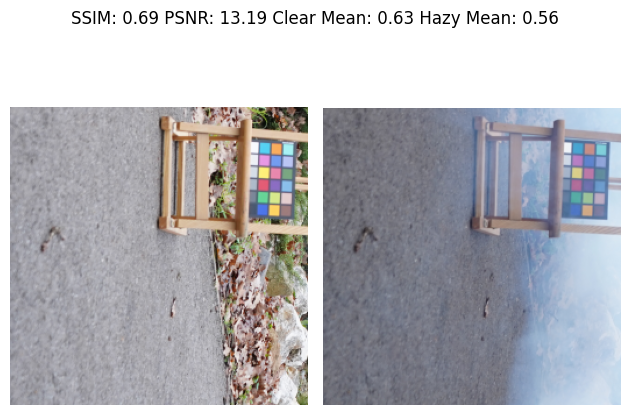

tensor([[[0.1018, 0.1098, 0.0845],
         [0.0842, 0.0907, 0.0676],
         [0.1117, 0.1131, 0.0933],
         ...,
         [0.4472, 0.5038, 0.2681],
         [0.3424, 0.4220, 0.1799],
         [0.2616, 0.3442, 0.1253]],

        [[0.1227, 0.1360, 0.0954],
         [0.1216, 0.1424, 0.1040],
         [0.0582, 0.0813, 0.0486],
         ...,
         [0.4099, 0.4755, 0.2235],
         [0.3635, 0.4463, 0.2121],
         [0.3393, 0.4184, 0.1898]],

        [[0.0963, 0.1148, 0.0544],
         [0.2811, 0.3341, 0.2587],
         [0.1325, 0.1873, 0.1280],
         ...,
         [0.4370, 0.5153, 0.2631],
         [0.4173, 0.4924, 0.2755],
         [0.3448, 0.4201, 0.1994]],

        ...,

        [[0.1377, 0.2522, 0.1915],
         [0.1983, 0.3147, 0.2558],
         [0.1628, 0.2755, 0.2282],
         ...,
         [0.9216, 0.9460, 0.9688],
         [0.9641, 0.9881, 0.9953],
         [0.9550, 0.9804, 0.9920]],

        [[0.1363, 0.2585, 0.1911],
         [0.1856, 0.3148, 0.2508],
         [0.

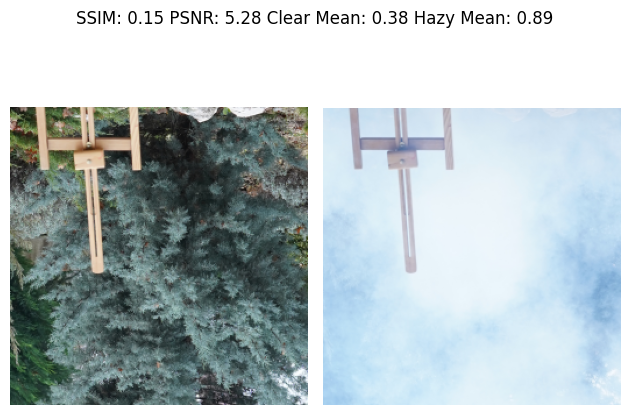

tensor([[[0.1203, 0.2223, 0.1860],
         [0.1098, 0.2118, 0.1680],
         [0.1438, 0.2505, 0.1955],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.1056, 0.2097, 0.1725],
         [0.1442, 0.2486, 0.1980],
         [0.1398, 0.2464, 0.1926],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.1694, 0.2761, 0.2384],
         [0.1638, 0.2736, 0.2221],
         [0.1660, 0.2723, 0.2242],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        ...,

        [[0.8867, 0.9231, 0.9504],
         [0.9051, 0.9360, 0.9602],
         [0.9049, 0.9283, 0.9562],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.7655, 0.8071, 0.8759],
         [0.8293, 0.8635, 0.9205],
         [0.

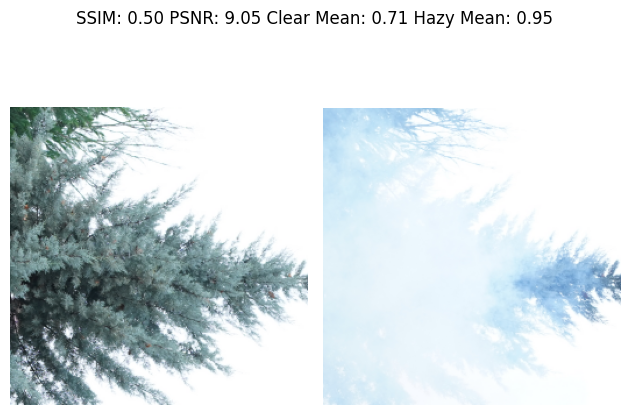

tensor([[[0.2813, 0.3592, 0.1958],
         [0.5362, 0.4991, 0.3992],
         [0.6673, 0.5238, 0.4595],
         ...,
         [0.4984, 0.5299, 0.4510],
         [0.6322, 0.6409, 0.5195],
         [0.5498, 0.5561, 0.4130]],

        [[0.2835, 0.3721, 0.2111],
         [0.3556, 0.3506, 0.2682],
         [0.6019, 0.4877, 0.4372],
         ...,
         [0.2916, 0.3555, 0.2281],
         [0.4058, 0.4259, 0.3042],
         [0.4075, 0.4419, 0.2693]],

        [[0.2587, 0.3649, 0.2110],
         [0.2696, 0.2580, 0.1645],
         [0.5915, 0.4800, 0.4199],
         ...,
         [0.2248, 0.2866, 0.1551],
         [0.2576, 0.2775, 0.1776],
         [0.3460, 0.3812, 0.2391]],

        ...,

        [[0.6188, 0.6136, 0.6488],
         [0.6364, 0.6300, 0.6613],
         [0.6290, 0.6251, 0.6565],
         ...,
         [0.5937, 0.5976, 0.6362],
         [0.6226, 0.6331, 0.6700],
         [0.6108, 0.6227, 0.6646]],

        [[0.6273, 0.6234, 0.6488],
         [0.6507, 0.6467, 0.6722],
         [0.

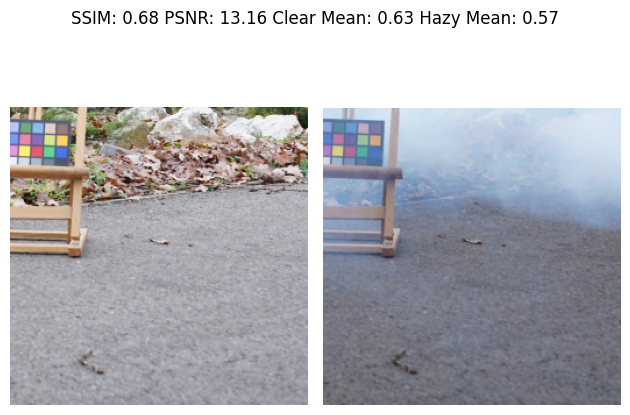

tensor([[[0.4659, 0.5754, 0.5556],
         [0.2911, 0.4212, 0.3892],
         [0.2315, 0.3467, 0.3282],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.4430, 0.5611, 0.5493],
         [0.5200, 0.6458, 0.6171],
         [0.4885, 0.6083, 0.5892],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.5023, 0.6198, 0.6115],
         [0.5335, 0.6510, 0.6442],
         [0.6275, 0.7432, 0.7271],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        ...,

        [[0.2300, 0.3046, 0.1765],
         [0.3282, 0.3224, 0.2355],
         [0.5556, 0.4987, 0.4507],
         ...,
         [0.2320, 0.2900, 0.1627],
         [0.2369, 0.2574, 0.1434],
         [0.3239, 0.3415, 0.2168]],

        [[0.1570, 0.2190, 0.1117],
         [0.1769, 0.1975, 0.1090],
         [0.

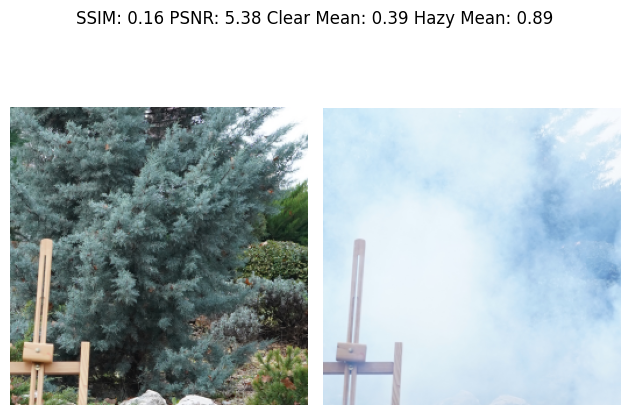

tensor([[[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.5015, 0.6049, 0.5918],
         [0.4260, 0.5369, 0.5241],
         [0.4031, 0.5060, 0.5018]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.5605, 0.6712, 0.6569],
         [0.4794, 0.5953, 0.5871],
         [0.5178, 0.6245, 0.6209]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [0.5117, 0.6300, 0.6100],
         [0.4737, 0.5915, 0.5857],
         [0.5035, 0.6135, 0.6099]],

        ...,

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.

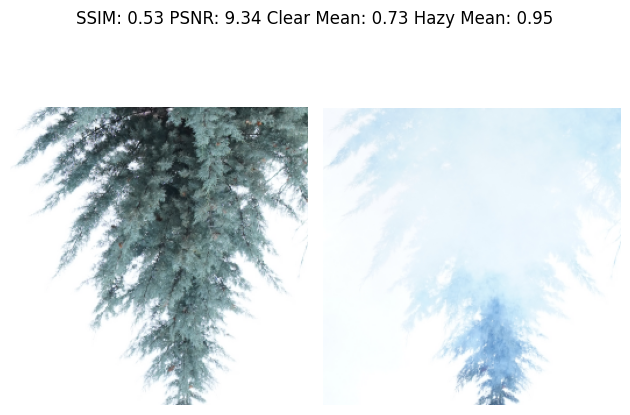

In [17]:
for i in range(count):
    fig, axs = plt.subplots(1, 2)
    for j, ax in enumerate(axs.flat):
        print(images[i * 2 + j])
        ax.imshow(images[i * 2 + j])
        ax.axis('off')
    plt.suptitle("SSIM: {:.2f} PSNR: {:.2f} Clear Mean: {:.2f} Hazy Mean: {:.2f}".format(
        images_metric[i]["SSIM"],
        images_metric[i]["PSNR"],
        images_metric[i]["Clear Mean"],
        images_metric[i]["Hazy Mean"],
    ))
    plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
    plt.tight_layout()
    plt.show()

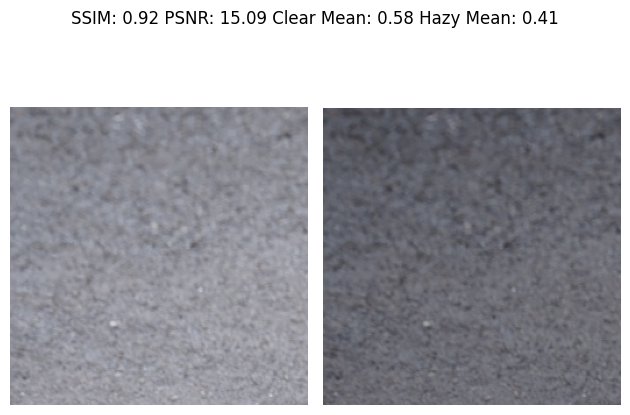

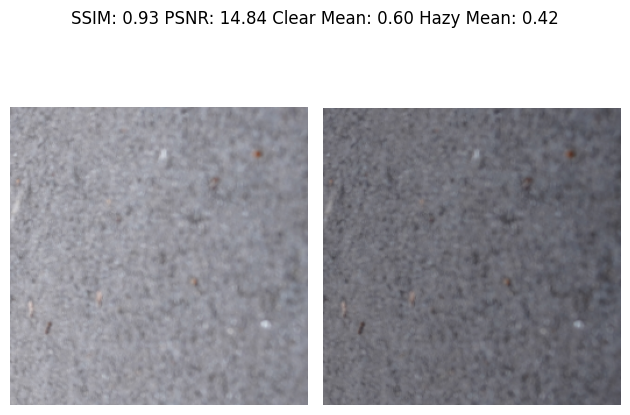

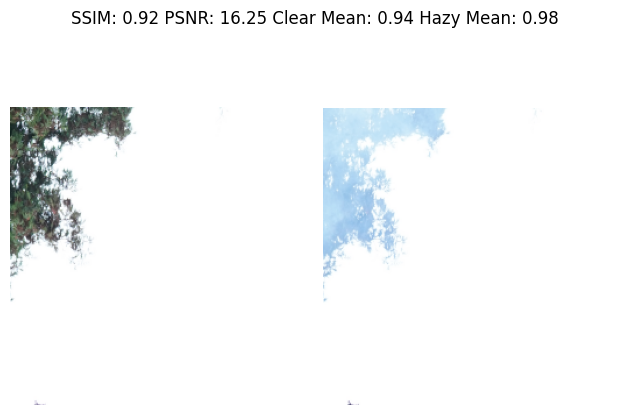

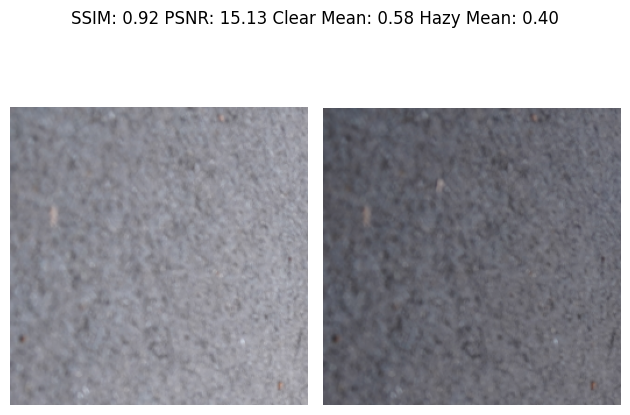

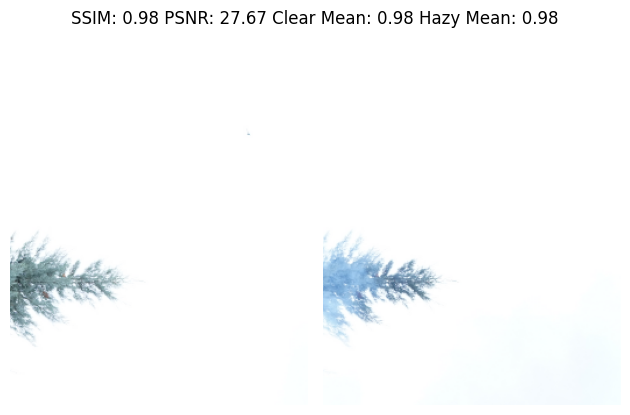

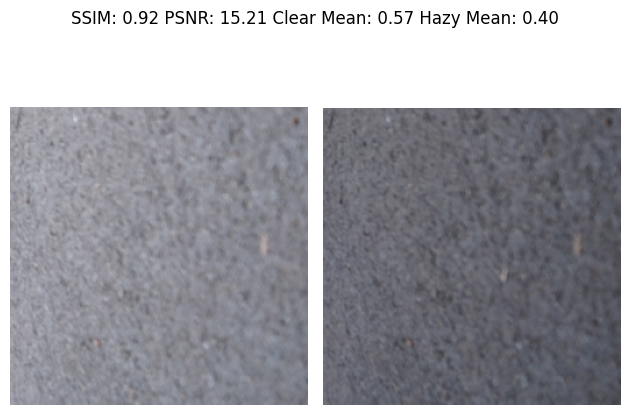

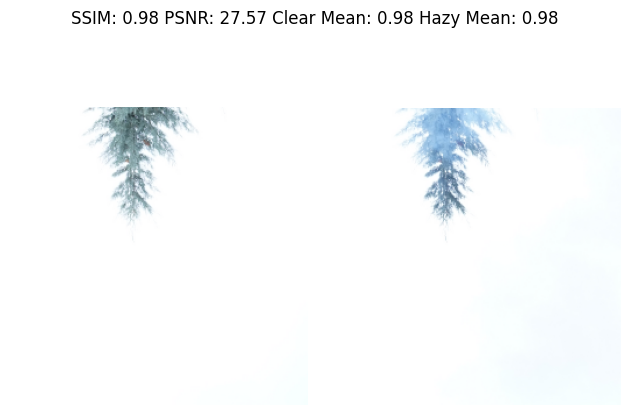

In [18]:
for i in range(count_bad):
    fig, axs = plt.subplots(1, 2)
    for j, ax in enumerate(axs.flat):
        ax.imshow(bad_images[i * 2 + j])
        ax.axis('off')
    plt.suptitle("SSIM: {:.2f} PSNR: {:.2f} Clear Mean: {:.2f} Hazy Mean: {:.2f}".format(
        bad_images_metric[i]["SSIM"],
        bad_images_metric[i]["PSNR"],
        bad_images_metric[i]["Clear Mean"],
        bad_images_metric[i]["Hazy Mean"],
    ))
    plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
    plt.tight_layout()
    plt.show()